<a href="https://colab.research.google.com/github/VorkovN/DecisionTreeClassifier/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
urlTrain="https://s70vla.storage.yandex.net/rdisk/cca02f4ea7823cdcf7157f56c10eea87374848c69028367f9d9ae3adb5c3ff48/6382ae9e/K-xrpLEn8irn7zwc4N1sc5fxFywO7xY7Q9EIPF4CvvYxXjIguLjpYv5K4I7w4pMVQHWmEQNNQe0f8RP9ekOAMg==?uid=0&filename=Train.csv&disposition=attachment&hash=69g%2BlKh7xI05oIeRuwWQtjqVSmBG9C2YwVaGmIVltSBtEQbfBWb9K7VGGPnHfIzXq%2FJ6bpmRyOJonT3VoXnDag%3D%3D%3A%2FTrain.csv&limit=0&content_type=text%2Fplain&owner_uid=551124952&fsize=219215&hid=f26e1b4834e2f80b46f5d9633499fcba&media_type=spreadsheet&tknv=v2&rtoken=6fVwJG5yQCzE&force_default=no&ycrid=na-e6c242bd9bddce0666fe97d9b05f0b16-downloader3e&ts=5ee68ccf26380&s=43602f7b268ef57f6c0bf5bc7baad2cfd30c33d1f0a05ca1dc41fe766af6465a&pb=U2FsdGVkX18l8vVa5_EYLMU9vtMY7TwxO9TRwsUUeF6nQpRP3QZXhUwhRM5ILXjhqR-XZ7Udd7cx1Ahd4MtKF7k1qIh2lpAGEa_6EAk-X4k"
urlTest="https://s169sas.storage.yandex.net/rdisk/2e41b4e8deb089754fb11810e43bf04d48ebfd01a83fbb76d9a55e38ea350678/6382afab/K-xrpLEn8irn7zwc4N1sczHi7ZiQTL0tV2x4B4ZPseHNmBmcN7xr0MfBv5Zdk3bNDLDD958_tfVXUq-59jtGNA==?uid=0&filename=Test.csv&disposition=attachment&hash=69g%2BlKh7xI05oIeRuwWQtjqVSmBG9C2YwVaGmIVltSBtEQbfBWb9K7VGGPnHfIzXq%2FJ6bpmRyOJonT3VoXnDag%3D%3D%3A%2FTest.csv&limit=0&content_type=text%2Fplain&owner_uid=551124952&fsize=91827&hid=c075a1b2780c130ed26b3bf5eb9b0f25&media_type=spreadsheet&tknv=v2&rtoken=Zivm2eHeYeg1&force_default=no&ycrid=na-a0d3b78df02a94a9ace05b2a79dee388-downloader11h&ts=5ee68dcfb00c0&s=632cb2a63031359b96a46991d980cb0568c53010fbb0f274c83e1523ecfb5bbf&pb=U2FsdGVkX18sR7GcZlWaldEfcUlMK7lNeGIxxRXAXtfSuUXdDuGtG2Z_dPIv9bZnADfQBeZSpD5tzXoICTzm3ZfwRWsLuKUbjVnEkGBhjoY"
urlAnswer="https://s116vlx.storage.yandex.net/rdisk/68924fd8ccbfafcff09930511b9d3e84f9d9d3dbeccfef62809fb3de2924aa3e/6382b4fe/K-xrpLEn8irn7zwc4N1sc05dgJ1sBJfvU-XapIHEoREhZi_Zc3HMxEtK2bh-zlL3Qk75KZSSQ8MKIL4noYhY9g==?uid=0&filename=SampleSubmission.csv&disposition=attachment&hash=69g%2BlKh7xI05oIeRuwWQtjqVSmBG9C2YwVaGmIVltSBtEQbfBWb9K7VGGPnHfIzXq%2FJ6bpmRyOJonT3VoXnDag%3D%3D%3A%2FSampleSubmission.csv&limit=0&content_type=text%2Fplain&owner_uid=551124952&fsize=2905&hid=27389897dbf5e29097b2f1117e1d3661&media_type=spreadsheet&tknv=v2&rtoken=g8VuvF4qSK7j&force_default=no&ycrid=na-daaaf0e64bdbdb9a04d23d1083f838a3-downloader23h&ts=5ee692e38bb80&s=a2d2725c862eb5bbe165781abab4f039a497af9dc940b6e515182000e0559ddd&pb=U2FsdGVkX18zssZH3WT1Xc7IEfwqqvaR0z7ORuY4qtHeD66duM9e71-Ck0WK1FZDSMwwfzacit9NjXFkn0aPZrH5JMrRKR65nJl6dA9NyXo"
train_data = pd.read_csv(urlTrain)
test_data = pd.read_csv(urlTest)
answer_data = pd.read_csv(urlAnswer)

In [2]:
trainX = pd.DataFrame(train_data.drop(['target', 'comments_count', 'replies_count', 'both_count', 'sentence_count', 'word_count'], axis=1))
trainY = pd.DataFrame(train_data['target']).values.ravel()

In [3]:
testX = pd.DataFrame(test_data.drop(['comments_count', 'replies_count', 'both_count', 'sentence_count', 'word_count'], axis=1))
testY = pd.DataFrame(answer_data).values.ravel()

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=20, #минимальное число объектов в листе
                              max_leaf_nodes=30, #максимальное число листьев
                              random_state=2020)
clf=tree.fit(trainX, trainY)

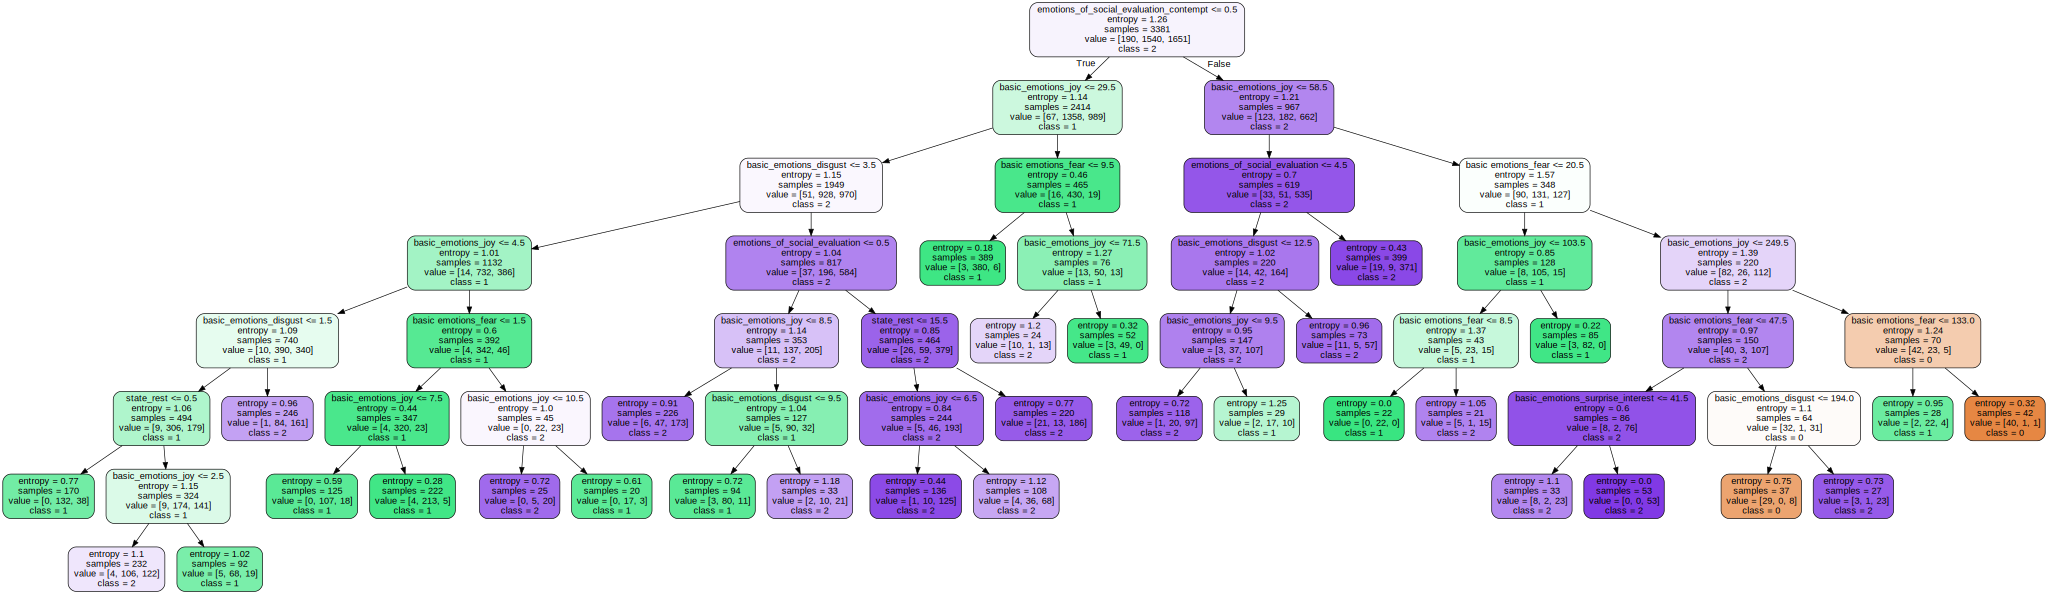

In [31]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(trainX.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1', '2'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [32]:
clf.tree_.max_depth

7

In [33]:
for i in range(testX.shape[0]):
  NewObject = testX.iloc[i].values.ravel()
  answer_data.iat[i, 0] = clf.predict([NewObject])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with

In [34]:
answer_data

,target
0,2
1,2
2,2
3,1
4,2
...,...
1444,1
1445,2
1446,2
1447,1


In [37]:
answer_data.to_csv('SampleSubmission4.csv', index=False)